# Load an Example Model

pgmpy provides a method pgmpy.utils.get_example_model to quickly load any model from the bnlearn repository: https://www.bnlearn.com/bnrepository/

c:\Users\adhav\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


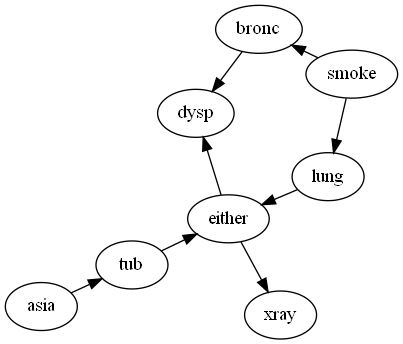

In [1]:
from IPython.display import Image
from pgmpy.utils import get_example_model

# Load the model
asia_model = get_example_model('asia')

# Visualize the network
viz = asia_model.to_graphviz()
viz.draw('./images/asia.png', prog='neato')
Image('./images/asia.png')

In [2]:
import pprint

# Access attributes of the model
nodes = asia_model.nodes()
edges = asia_model.edges()
cpds = asia_model.get_cpds()

print(f"Nodes in the model: {nodes} \n")
print(f"Edges in the model: {edges} \n")
print(f"CPDs in the model: ")
pprint.pp(cpds)

Nodes in the model: ['asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray', 'dysp'] 

Edges in the model: [('asia', 'tub'), ('tub', 'either'), ('smoke', 'lung'), ('smoke', 'bronc'), ('lung', 'either'), ('bronc', 'dysp'), ('either', 'xray'), ('either', 'dysp')] 

CPDs in the model: 
[<TabularCPD representing P(asia:2) at 0x1e5b78bdbe0>,
 <TabularCPD representing P(bronc:2 | smoke:2) at 0x1e5b77eee90>,
 <TabularCPD representing P(dysp:2 | bronc:2, either:2) at 0x1e5b77ef110>,
 <TabularCPD representing P(either:2 | lung:2, tub:2) at 0x1e5b78d5940>,
 <TabularCPD representing P(lung:2 | smoke:2) at 0x1e5b78d5a70>,
 <TabularCPD representing P(smoke:2) at 0x1e5b9072450>,
 <TabularCPD representing P(tub:2 | asia:2) at 0x1e5b788f240>,
 <TabularCPD representing P(xray:2 | either:2) at 0x1e5b788f020>]


# Defining the model manually

Defining a network in pgmpy involves two steps: 1. Define the network structure 2. Define the parameterization, i.e. CPDs

And lastly, CPDs can be associated with the network. Taking an example of the Cancer network from the bnlearn repository as shown below.

In [4]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Step 1: Define the network structure.
cancer_model = BayesianNetwork(
    [
        ("Pollution", "Cancer"),
        ("Smoker", "Cancer"),
        ("Cancer", "Xray"),
        ("Cancer", "Dyspnoea"),
    ]
)

# Step 2: Define the CPDs.
cpd_poll = TabularCPD(variable="Pollution", variable_card=2, values=[[0.9], [0.1]])
cpd_smoke = TabularCPD(variable="Smoker", variable_card=2, values=[[0.3], [0.7]])
cpd_cancer = TabularCPD(
    variable="Cancer",
    variable_card=2,
    values=[[0.03, 0.05, 0.001, 0.02], [0.97, 0.95, 0.999, 0.98]],
    evidence=["Smoker", "Pollution"],
    evidence_card=[2, 2],
)
cpd_xray = TabularCPD(
    variable="Xray",
    variable_card=2,
    values=[[0.9, 0.2], [0.1, 0.8]],
    evidence=["Cancer"],
    evidence_card=[2],
)
cpd_dysp = TabularCPD(
    variable="Dyspnoea",
    variable_card=2,
    values=[[0.65, 0.3], [0.35, 0.7]],
    evidence=["Cancer"],
    evidence_card=[2],
)

# Step 3: Add the CPDs to the model.
cancer_model.add_cpds(cpd_poll, cpd_smoke, cpd_cancer, cpd_xray, cpd_dysp)

# Step 4: Check if the model is correctly defined.
cancer_model.check_model()

True

# Generate a complete random model

pgmpy offers methods to: 1. Generate a completely random network 2. Given a network structure, generate random CPDs.

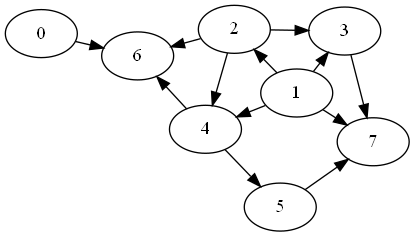

In [5]:
from pgmpy.models import BayesianNetwork

random_model = BayesianNetwork.get_random(n_nodes=8, edge_prob=0.4, n_states=2, latents=True)

# Visualize the network
viz = random_model.to_graphviz()
viz.draw('random.png', prog='neato')
Image('random.png')

In [6]:
import pprint

# Access attributes of the model
nodes = random_model.nodes()
edges = random_model.edges()
cpds = random_model.get_cpds()

print(f"Nodes in the model: {nodes} \n")
print(f"Edges in the model: {edges} \n")
print(f"CPDs in the model: ")
pprint.pp(cpds)

Nodes in the model: [0, 6, 1, 2, 3, 4, 7, 5] 

Edges in the model: [(0, 6), (1, 2), (1, 3), (1, 4), (1, 7), (2, 3), (2, 4), (2, 6), (3, 7), (4, 5), (4, 6), (5, 7)] 

CPDs in the model: 
[<TabularCPD representing P(0:2) at 0x1e5c0938590>,
 <TabularCPD representing P(6:2 | 0:2, 2:2, 4:2) at 0x1e5b938ca10>,
 <TabularCPD representing P(1:2) at 0x1e5b796a510>,
 <TabularCPD representing P(2:2 | 1:2) at 0x1e5b7969850>,
 <TabularCPD representing P(3:2 | 1:2, 2:2) at 0x1e5b9091d30>,
 <TabularCPD representing P(4:2 | 1:2, 2:2) at 0x1e5b9091e90>,
 <TabularCPD representing P(7:2 | 1:2, 3:2, 5:2) at 0x1e5b795bcf0>,
 <TabularCPD representing P(5:2 | 4:2) at 0x1e5b8ff0230>]


## Generate random CPDs for a given network structure¶


In [7]:
# Taking the example of the cancer model.

cancer_random = BayesianNetwork(
    [
        ("Pollution", "Cancer"),
        ("Smoker", "Cancer"),
        ("Cancer", "Xray"),
        ("Cancer", "Dyspnoea"),
    ]
)

cancer_random.get_random_cpds(n_states=3, inplace=True)

# Access attributes of the model
nodes = cancer_random.nodes()
edges = cancer_random.edges()
cpds = cancer_random.get_cpds()

print(f"Nodes in the model: {nodes} \n")
print(f"Edges in the model: {edges} \n")
print(f"CPDs in the model: ")
pprint.pp(cpds)

Nodes in the model: ['Pollution', 'Cancer', 'Smoker', 'Xray', 'Dyspnoea'] 

Edges in the model: [('Pollution', 'Cancer'), ('Cancer', 'Xray'), ('Cancer', 'Dyspnoea'), ('Smoker', 'Cancer')] 

CPDs in the model: 
[<TabularCPD representing P(Pollution:3) at 0x1e5b8fc4ef0>,
 <TabularCPD representing P(Cancer:3 | Pollution:3, Smoker:3) at 0x1e5b8fc4f80>,
 <TabularCPD representing P(Smoker:3) at 0x1e5b8fc5010>,
 <TabularCPD representing P(Xray:3 | Cancer:3) at 0x1e5b8fc50a0>,
 <TabularCPD representing P(Dyspnoea:3 | Cancer:3) at 0x1e5b8fc5130>]


# Inference in Discrete Bayesian Network

a simple example for doing Exact inference in Bayesian Networks using pgmpy. We will be using the Asia network (http://www.bnlearn.com/bnrepository/#asia) for this example.

## initialize inference class

In [8]:
from pgmpy.inference import VariableElimination

asia_infer = VariableElimination(asia_model)

## Doing inference using hard evidence

In [9]:
# Computing the probability of bronc given smoke=no.
q = asia_infer.query(variables=["bronc"], evidence={"smoke": "no"})
print(q)

# Computing the joint probability of bronc and asia given smoke=yes
q = asia_infer.query(variables=["bronc", "asia"], evidence={"smoke": "yes"})
print(q)

# Computing the probabilities (not joint) of bronc and asia given smoke=no
q = asia_infer.query(variables=["bronc", "asia"], evidence={"smoke": "no"}, joint=False)
for factor in q.values():
    print(factor)

+------------+--------------+
| bronc      |   phi(bronc) |
+============+==============+
| bronc(yes) |       0.3000 |
+------------+--------------+
| bronc(no)  |       0.7000 |
+------------+--------------+
+------------+-----------+-------------------+
| bronc      | asia      |   phi(bronc,asia) |
+============+===========+===================+
| bronc(yes) | asia(yes) |            0.0060 |
+------------+-----------+-------------------+
| bronc(yes) | asia(no)  |            0.5940 |
+------------+-----------+-------------------+
| bronc(no)  | asia(yes) |            0.0040 |
+------------+-----------+-------------------+
| bronc(no)  | asia(no)  |            0.3960 |
+------------+-----------+-------------------+
+------------+--------------+
| bronc      |   phi(bronc) |
+============+==============+
| bronc(yes) |       0.3000 |
+------------+--------------+
| bronc(no)  |       0.7000 |
+------------+--------------+
+-----------+-------------+
| asia      |   phi(asia) |
+======

In [10]:
# Computing the MAP of bronc given smoke=no.
q = asia_infer.map_query(variables=["bronc"], evidence={"smoke": "no"})
print(q)

# Computing the MAP of bronc and asia given smoke=yes
q = asia_infer.map_query(variables=["bronc", "asia"], evidence={"smoke": "yes"})
print(q)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


{'bronc': 'no'}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

{'bronc': 'yes', 'asia': 'no'}


## Inferencing from virtual evidence

In [11]:
from pgmpy.factors.discrete import TabularCPD

# Get state name, which ensure lung evidence has same state names as asia_model
state_names = asia_model.get_cpds('lung').state_names

lung_virt_evidence = TabularCPD(variable="lung", variable_card=2, values=[[0.4], [0.6]],state_names=state_names)

# Query with hard evidence smoke = no and virtual evidence lung = [0.4, 0.6]
q = asia_infer.query(
    variables=["bronc"], evidence={"smoke": "no"}, virtual_evidence=[lung_virt_evidence]
)
print(q)

# Query with hard evidence smoke = no and virtual evidences lung = [0.4, 0.6] and bronc = [0.3, 0.7]
lung_virt_evidence = TabularCPD(variable="lung", variable_card=2, values=[[0.4], [0.7]])

+------------+--------------+
| bronc      |   phi(bronc) |
+============+==============+
| bronc(yes) |       0.3000 |
+------------+--------------+
| bronc(no)  |       0.7000 |
+------------+--------------+


In [12]:
print(asia_model.get_cpds("lung"))

+-----------+------------+-----------+
| smoke     | smoke(yes) | smoke(no) |
+-----------+------------+-----------+
| lung(yes) | 0.1        | 0.01      |
+-----------+------------+-----------+
| lung(no)  | 0.9        | 0.99      |
+-----------+------------+-----------+


## Troubleshooting for slow inference

In the case of large models, or models in which variables have a lot of states, inference can be quite slow. Some of the ways to deal with it are:

Reduce the number of states of variables by combining states together.

Try a different elimination order by specifying `elimination_order` argument. Possible options are: MinFill, MinNeighbors, MinWeight, WeightedMinFill.

Try a custom elimination order: The implemented heuristics for computing the elimination order might not be efficient in every case. If you can think of a more efficient order, you can also pass it as a list to the `elimination_order` argument.

If it is still too slow, try using approximate inference using sampling algorithms.